# Video Game Sales Exploratory Data Analysis

### Context

Dataset Link: link[Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales)

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.
Fields include
1. Rank - Ranking of overall sales
2. Name - The games name
3. Platform - Platform of the games release (i.e. PC,PS4, etc.)
4. Year - Year of the game's release
5. Genre - Genre of the game
6. Publisher - Publisher of the game
7. NA_Sales - Sales in North America (in millions)
8. EU_Sales - Sales in Europe (in millions)
9. JP_Sales - Sales in Japan (in millions)
10. Other_Sales - Sales in the rest of the world (in millions)
11. Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np

In [55]:
df = pd.read_csv('../data/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [56]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [58]:
df_filtered = df.dropna(subset='Publisher')
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Publisher

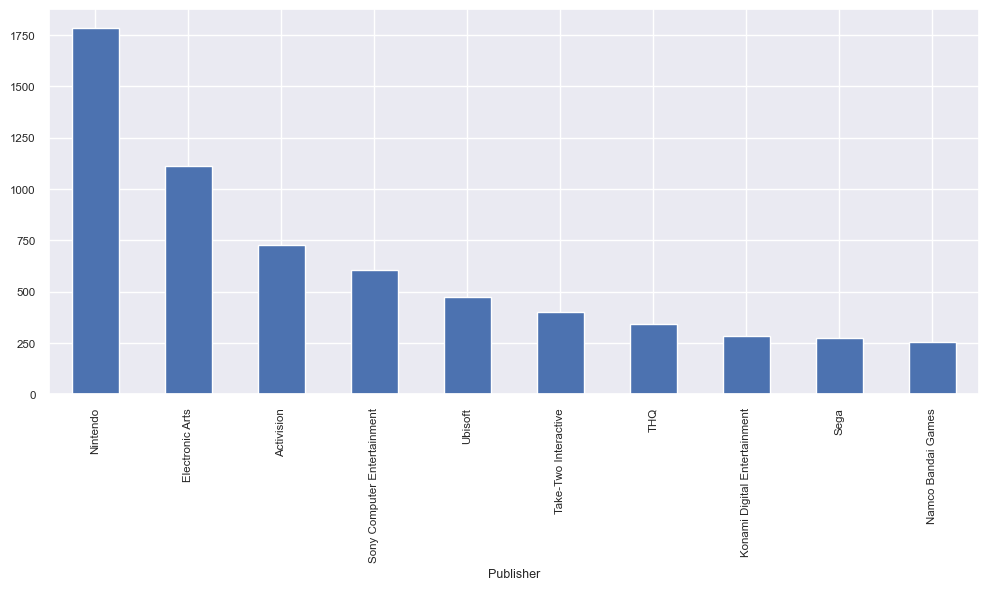

In [59]:
per_publisher_sale = df_filtered.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 5))
per_publisher_sale.plot(kind='bar')
plt.show()

In [60]:
publisher_sale_df = df_filtered[['Publisher','NA_Sales', 'EU_Sales','JP_Sales','Global_Sales']]
publisher_sale_df = publisher_sale_df.groupby('Publisher').sum().reset_index().sort_values('Global_Sales', ascending=False)
# publisher_sale_df.to_csv('../data/publisher_sales.csv')
publisher_sale_df


,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
359,Nintendo,816.87,418.74,455.42,1786.56
138,Electronic Arts,595.07,371.27,14.04,1110.32
21,Activision,429.70,215.53,6.54,727.46
456,Sony Computer Entertainment,265.22,187.72,74.10,607.50
525,Ubisoft,253.43,163.32,7.50,474.72
...,...,...,...,...,...
375,Ongakukan,0.00,0.00,0.01,0.01
96,Commseed,0.00,0.00,0.01,0.01
495,Takuyo,0.00,0.00,0.01,0.01
76,Boost On,0.00,0.00,0.01,0.01


PARTITIONS: 
  NA_Sales: 49.23 %
  EU_Sales: 27.28 %
  JP_Sales: 14.48 %


<function matplotlib.pyplot.show(close=None, block=None)>

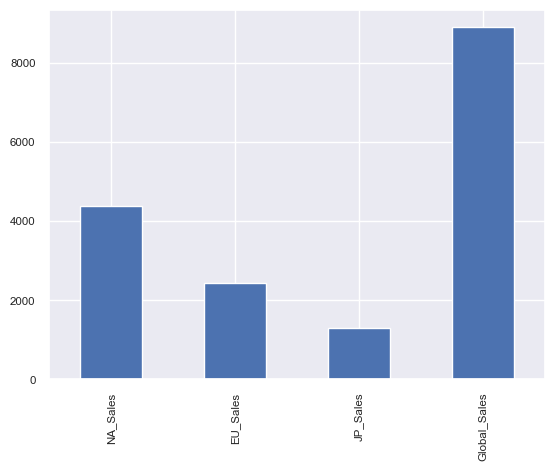

In [61]:
total_sales_per_reg = publisher_sale_df.iloc[:, 1:].sum()
total_sales_per_reg.plot(kind='bar')
na_sales_part = math.floor((total_sales_per_reg[0]/total_sales_per_reg[-1])*10000) / 100
eu_sales_part = math.floor((total_sales_per_reg[1]/total_sales_per_reg[-1])*10000) / 100
jp_sales_part = math.floor((total_sales_per_reg[2]/total_sales_per_reg[-1])*10000) / 100
print(f'PARTITIONS: \n  NA_Sales: {na_sales_part} %\n  EU_Sales: {eu_sales_part} %\n  JP_Sales: {jp_sales_part} %')
plt.show

In [62]:
pub_plat_sales = df_filtered.groupby(['Publisher', 'Platform'])['Global_Sales'].sum().sort_values(ascending=False)
pub_plat_sales

Publisher                    Platform
Nintendo                     Wii         390.46
                             DS          349.75
Electronic Arts              PS2         255.79
Nintendo                     GB          230.09
Sony Computer Entertainment  PS          193.73
                                          ...  
Kadokawa Games               3DS           0.01
Alternative Software         XOne          0.01
Kaga Create                  PS3           0.01
                             PSP           0.01
Epic Games                   PS4           0.01
Name: Global_Sales, Length: 1801, dtype: float64

In [72]:
top_publishers = [publisher for publisher in publisher_sale_df[:20]['Publisher']]
pub_sales_per_plat_pivot = df_filtered[df_filtered['Publisher'].isin(top_publishers)] \
                            .pivot_table(values='Global_Sales', index='Publisher', columns='Platform', fill_value=0, aggfunc=np.mean, margins=True)
pub_sales_per_plat_pivot
pub_sales_per_plat_pivot.to_csv('../data/publisher_sales_per_platform.csv')